<a href="https://colab.research.google.com/github/Sara-Dastpak/Neural-Network-Assignments/blob/main/HW3/caltech101_cnn_regularization_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [ ]:
!pip install tensorflow matplotlib


In [ ]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds

# Load the dataset
caltech101 = tfds.load('caltech101', as_supervised=True, split=['train[:90%]', 'train[90%:]', 'test'], with_info=True)
(train_data, val_data, test_data), info = caltech101

# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150)) / 255.0  # Normalize and resize
    label = tf.one_hot(label, depth=info.features['label'].num_classes)
    return image, label

# Apply preprocessing
train_data = train_data.map(preprocess).batch(32).shuffle(1000)
val_data = val_data.map(preprocess).batch(32)
test_data = test_data.map(preprocess).batch(32)

print("Dataset loaded and preprocessed!")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3060 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/caltech101/incomplete.GO4SD8_3.0.2/caltech101-train.tfrecord*...:   0%|   …

Generating test examples...:   0%|          | 0/6084 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/caltech101/incomplete.GO4SD8_3.0.2/caltech101-test.tfrecord*...:   0%|    …

Dataset caltech101 downloaded and prepared to /root/tensorflow_datasets/caltech101/3.0.2. Subsequent calls will reuse this data.
Dataset loaded and preprocessed!


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Load Caltech-101 dataset using TensorFlow Datasets
caltech101 = tfds.load('caltech101', as_supervised=True, split=['train[:90%]', 'train[90%:]', 'test'], with_info=True)
(train_data, val_data, test_data), info = caltech101

def preprocess(image, label):
    # Resize images to 150x150 and normalize pixel values
    image = tf.image.resize(image, (150, 150)) / 255.0
    return image, label

# Data Augmentation function
def augment_data(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)
    image = tf.image.random_brightness(image, max_delta=0.2)
    return preprocess(image, label)

# Preprocess and batch the datasets
batch_size = 32
train_data = train_data.map(augment_data).batch(batch_size).shuffle(1000)
val_data = val_data.map(preprocess).batch(batch_size)
test_data = test_data.map(preprocess).batch(batch_size)

# Print dataset summary
print(f"Number of classes: {info.features['label'].num_classes}")


Number of classes: 102


In [ ]:
# Define the CNN model with 5x5 filters
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (5, 5), activation='leaky_relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (5, 5), activation='leaky_relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='leaky_relu'),
        layers.Dense(info.features['label'].num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Epoch 1/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.0202 - loss: 4.8175 - val_accuracy: 0.0458 - val_loss: 4.4260
Epoch 2/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.0673 - loss: 4.4061 - val_accuracy: 0.1078 - val_loss: 4.1829
Epoch 3/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.1434 - loss: 3.9961 - val_accuracy: 0.1601 - val_loss: 3.7476
Epoch 4/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.2768 - loss: 3.2344 - val_accuracy: 0.1993 - val_loss: 3.5712
Epoch 5/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4064 - loss: 2.6726 - val_accuracy: 0.2582 - val_loss: 3.3919
Epoch 6/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5067 - loss: 2.1635 - val_accuracy: 0.2647 - val_loss: 3.7715
Epoch 7/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.5968 - loss: 1.8096 - val_accuracy: 0.2745 - val_loss: 3.7973
Epoch 8/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6714 - loss: 1.4979 - val_accuracy: 0.3039 

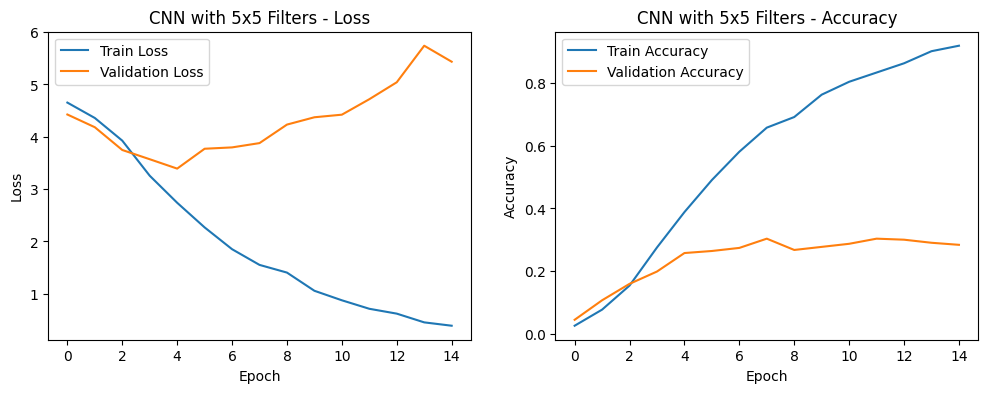

In [ ]:
model = create_model()
history = model.fit(train_data, validation_data=val_data, epochs=15)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Function to plot metrics
def plot_metrics(history, title):
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{title} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

# Plot metrics for the model
plot_metrics(history, "CNN with 5x5 Filters")

In [ ]:
# Define a function to create the model
def create_model(regularization=None):
    layers_list = [
        layers.Conv2D(32, (5, 5), activation='leaky_relu', input_shape=(150, 150, 3),
                      kernel_regularizer=regularization),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (5, 5), activation='leaky_relu', kernel_regularizer=regularization),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='leaky_relu', kernel_regularizer=regularization),
        layers.Dropout(0.5),  # Dropout is always added
        layers.Dense(info.features['label'].num_classes, activation='softmax')
    ]

    model = models.Sequential(layers_list)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Train and evaluate models with different regularization techniques
from tensorflow.keras import regularizers
regularization_methods = {
    "Dropout Only": None,
    "L1 Regularization": regularizers.l1(0.001),
    "L2 Regularization": regularizers.l2(0.001)
}

results = {}

for name, reg in regularization_methods.items():
    print(f"\nTraining model with {name}...\n")
    model = create_model(regularization=reg)
    history = model.fit(train_data, validation_data=val_data, epochs=15)
    test_loss, test_accuracy = model.evaluate(test_data)
    results[name] = {
        "history": history,
        "test_loss": test_loss,
        "test_accuracy": test_accuracy
    }
    print(f"{name} - Test Accuracy: {test_accuracy:.2f}")


Training model with Dropout Only...

Epoch 1/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.0197 - loss: 5.0715 - val_accuracy: 0.0359 - val_loss: 4.5294
Epoch 2/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.0279 - loss: 4.6094 - val_accuracy: 0.0490 - val_loss: 4.3567
Epoch 3/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.0821 - loss: 4.3975 - val_accuracy: 0.0817 - val_loss: 4.1696
Epoch 4/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.1135 - loss: 4.1233 - val_accuracy: 0.1307 - val_loss: 3.9153
Epoch 5/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.1735 - loss: 3.8173 - val_accuracy: 0.1699 - val_loss: 3.7227
Epoch 6/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2439 - loss: 3.4069 - val_accuracy: 0.2092 - val_loss: 3.5251
Epoch 7/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.3041 - loss: 3.0604 - val_accuracy: 0.2222 - val_loss: 3.4838
Epoch 8/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3387

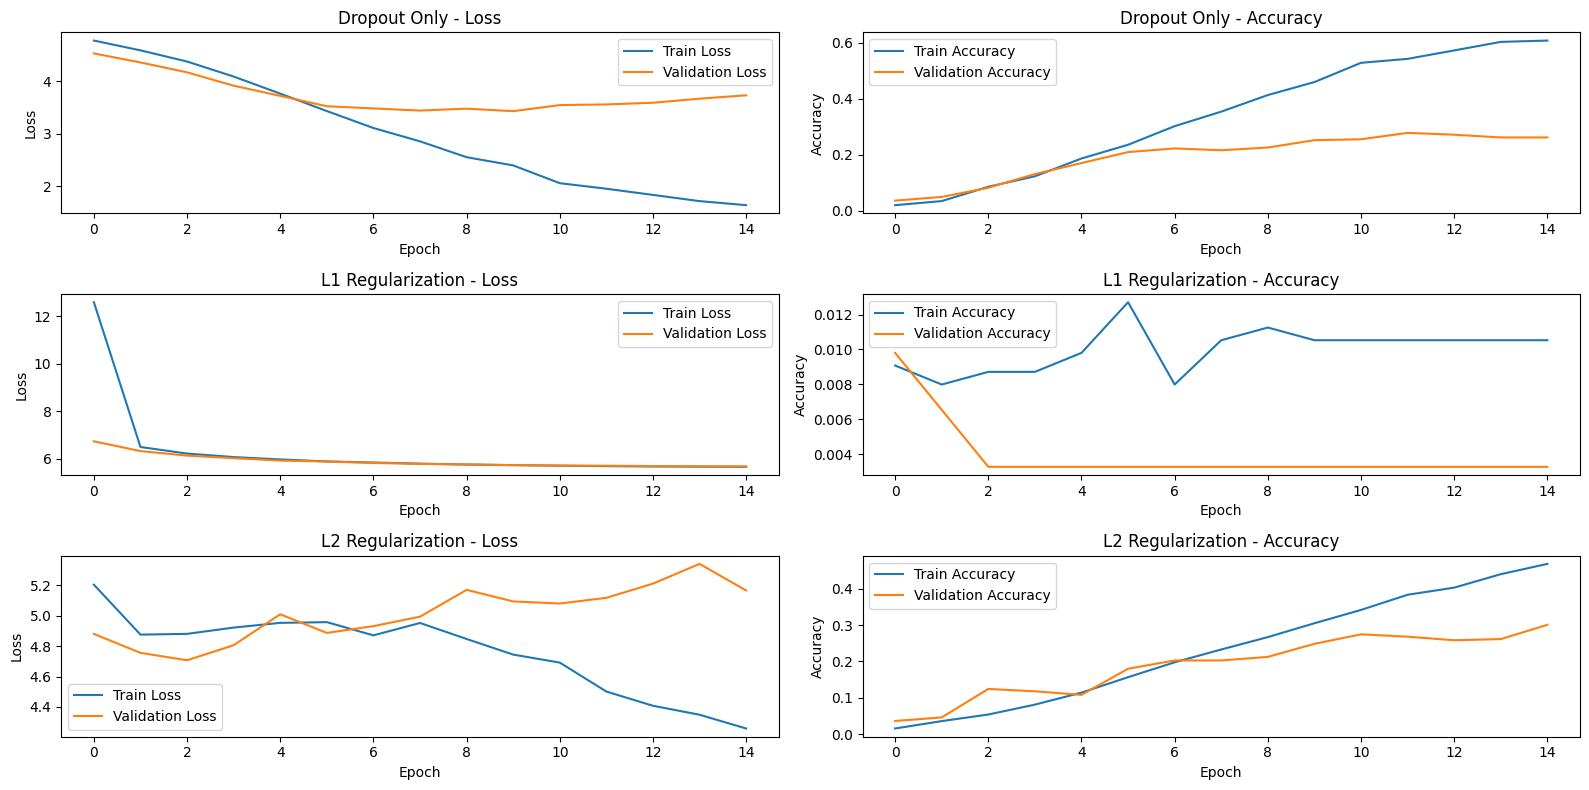

Dropout Only - Test Loss: 2.82, Test Accuracy: 0.46
L1 Regularization - Test Loss: 5.66, Test Accuracy: 0.01
L2 Regularization - Test Loss: 4.60, Test Accuracy: 0.45


In [ ]:
# Function to plot metrics for comparison
def plot_comparisons(results):
    plt.figure(figsize=(16, 8))

    for idx, (name, data) in enumerate(results.items()):
        history = data["history"]

        # Loss Plot
        plt.subplot(3, 2, idx * 2 + 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f"{name} - Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()

        # Accuracy Plot
        plt.subplot(3, 2, idx * 2 + 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f"{name} - Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()

    plt.tight_layout()
    plt.show()

# Plot comparison metrics
plot_comparisons(results)

# Print final results
for name, data in results.items():
    print(f"{name} - Test Loss: {data['test_loss']:.2f}, Test Accuracy: {data['test_accuracy']:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


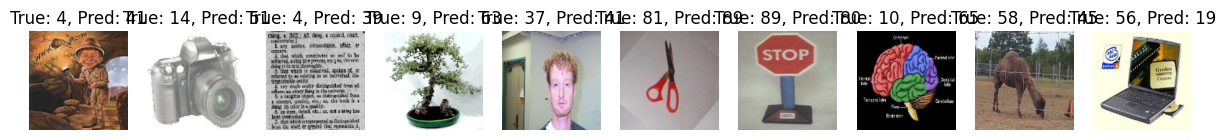

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# List to store misclassified images and labels (limit to 5 for simplicity)
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

# Process a smaller number of images from the test data (for efficiency)
num_images_to_check = 20  # Only check 5 images to reduce computation

# Test the model on a limited number of images
for image, label in test_data.take(1):  # Take just one batch of data
    for i in range(min(image.shape[0], num_images_to_check)):  # Limit to `num_images_to_check` images
        single_image = image[i]  # Get one image from the batch
        single_label = label[i]  # Get the label corresponding to the image

        # Add batch dimension to single image (shape should be (1, 150, 150, 3))
        single_image = tf.expand_dims(single_image, axis=0)

        # Make prediction
        predictions = model.predict(single_image)

        # Get predicted label
        predicted_label = np.argmax(predictions, axis=1)[0]

        # Check if the prediction is incorrect
        if predicted_label != single_label:
            misclassified_images.append(single_image[0])  # Store the original image
            misclassified_labels.append(single_label)
            misclassified_preds.append(predicted_label)

        # Stop if we've collected enough misclassified images
        if len(misclassified_images) >= num_images_to_check:
            break
    if len(misclassified_images) >= num_images_to_check:
        break

# Plot misclassified images
def plot_misclassified_images(images, labels, preds, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {labels[i]}, Pred: {preds[i]}")
        plt.axis('off')
    plt.show()

# Display the misclassified images
plot_misclassified_images(misclassified_images, misclassified_labels, misclassified_preds)
